# CNN文本分類實戰

- 1. 文本數據預處理，必須都是相同長度，相同向量維度
- 2. 構建卷積模型，注意卷積核大小的設計
- 3. 將卷積後的特徵圖池化成一個特徵
- 4. 將多種特徵拼接在一起，準備完成分類任務

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_features = 3000
sequence_length = 300
embedding_dimension = 100
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_features)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [2]:
x_train = pad_sequences(x_train, maxlen=sequence_length)
x_test = pad_sequences(x_train, maxlen=sequence_length)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 300)
(25000, 300)
(25000,)
(25000,)


In [3]:
# 多種卷積核，相當於單詞數
filter_size = [3,4,5]
def convolution():
    inn = layers.Input(shape=(sequence_length, embedding_dimension, 1)) #3維
    cnns = []
    for size in filter_size:
        conv = layers.Conv2D(filters=64, kernel_size=(size, embedding_dimension),
                            strides=1, padding='valid', activation='relu')(inn)
        #需要將多種卷積後的特徵圖池化成一個特徵
        pool = layers.MaxPool2D(pool_size=(sequence_length-size+1, 1), padding='valid')(conv)
        cnns.append(pool)
    # 將得到的特徵拼接在一起
    outt = layers.concatenate(cnns)
    
    model = keras.Model(inputs=inn, outputs=outt)
    return model

def cnn_mulfilter():
    model = keras.Sequential([
        layers.Embedding(input_dim=num_features, output_dim=embedding_dimension,
                        input_length=sequence_length),
        layers.Reshape((sequence_length, embedding_dimension, 1)),
        convolution(),
        layers.Flatten(),
        layers.Dense(10, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model

model = cnn_mulfilter()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          300000    
_________________________________________________________________
reshape (Reshape)            (None, 300, 100, 1)       0         
_________________________________________________________________
model (Functional)           (None, 1, 1, 192)         76992     
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1930      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [4]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Epoch 1/5
352/352 [==============================] - 75s 206ms/step - loss: 0.6077 - accuracy: 0.6302 - val_loss: 0.3371 - val_accuracy: 0.8620
Epoch 2/5
352/352 [==============================] - 66s 187ms/step - loss: 0.3335 - accuracy: 0.8651 - val_loss: 0.2913 - val_accuracy: 0.8748
Epoch 3/5
352/352 [==============================] - 66s 189ms/step - loss: 0.2672 - accuracy: 0.9025 - val_loss: 0.2829 - val_accuracy: 0.8864
Epoch 4/5
352/352 [==============================] - 71s 201ms/step - loss: 0.2131 - accuracy: 0.9288 - val_loss: 0.2819 - val_accuracy: 0.8852
Epoch 5/5
352/352 [==============================] - 69s 195ms/step - loss: 0.1712 - accuracy: 0.9433 - val_loss: 0.3053 - val_accuracy: 0.8908


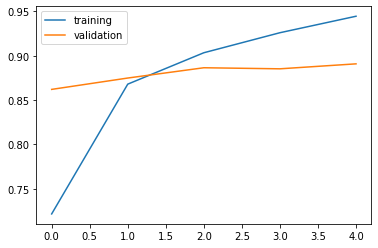

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()